In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import pandas 

from lib import loading

df = loading.load_data()
print("We have {0} labelled examples.".format(len(df)))

Read the data file from ./airline-twitter-sentiment/Tweets.csv
We have 14640 labelled examples.


## We will try various classification algorithms

We will try the following:
* Naive Bayes
* kNearest Neighbours
* SVM

In [4]:
from lib import processing

training_data, testing_data = processing.process_data(df, sample_size=1)

Using a total of 14640 tweets
Training sample size: 13161
Testing sample size: 1479


### Naive Bayes

In [7]:
from nltk.sentiment import SentimentAnalyzer
from nltk.classify import NaiveBayesClassifier
from lib import classify

sentim_analyzer = SentimentAnalyzer()
classify.add_features(training_data, sentim_analyzer)
train, test = classify.extract_features(training_data, testing_data, sentim_analyzer)
trainer = {
    'name': 'Naive Bayes Classifier',
    'train': NaiveBayesClassifier.train,
}
classifier, evaluation, _ = classify.train_model(train, test, sentim_analyzer, trainer)

Number of features: 1708
Training: Naive Bayes Classifier
Training classifier
Evaluating NaiveBayesClassifier results...


In [12]:
y_test = [y for _, y in test]
y_pred = [classifier.classify(f) for f, _ in test]

[[811 108  38]
 [ 88 181  33]
 [ 26  28 166]]


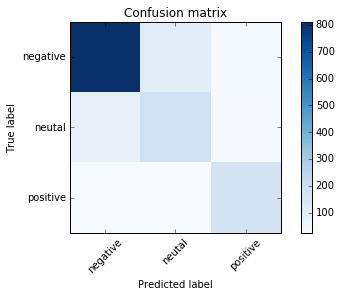

In [27]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(3)
    plt.xticks(tick_marks, ['negative', 'neutal', 'positive'], rotation=45)
    plt.yticks(tick_marks, ['negative', 'neutal', 'positive'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

print(cm)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)